# python extract pixel values using PIL

load photos sample data stored in a directory ./dataset_TEST/ as .jpeg
https://pillow.readthedocs.io/en/3.1.x/reference/Image.html 


In [53]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

def get_imlist(path):
  """  Returns a list of all photo samples in directory. """
  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)
 
def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)

def get_histogram(image):
    """  histogram of the image in R,G,B """
    if hasattr(image, 'filename'):
        print(image.filename)
        filename=str('Sample '+ (image.filename.split("/")[2]).split(".")[0])
        
    else:
         filename=str('Sample')
        
    histogram = image.histogram()
    count_R = histogram[0:256]
    count_G = histogram[512:768]
    count_B = histogram[256:512]
    plt.figure(0)
    for i in range(0, 256):
        plt.bar(i, count_R[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)
        plt.xlabel("Red band")
        plt.ylabel("Pixel Count for Red band")
        plt.title( filename + " Red")
    
    name = str(filename + " Red.jpg")
    plt.savefig('./output/'+ name)
    plt.figure(1)
    for i in range(0, 256):
        plt.bar(i, count_G[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)
        plt.xlabel("Green band")
        plt.ylabel("Pixel Count for Green band")
        plt.title( filename + " Green")
    
    name = str(filename + " Green.jpg")
    plt.savefig('./output/'+ name)
    plt.figure(2)
    for i in range(0, 256):
        plt.bar(i, count_B[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)
        plt.xlabel("blue band")
        plt.ylabel("Pixel Count for blue band")
        plt.title( filename + " Blue")
    name = str(filename+ " Blue.jpg")
    plt.savefig('./output/'+ name)
    plt.show()

def get_scatter(image):
    """  Returns a 3d scatter graph for image. """
    fig = plt.figure()
    ax = Axes3D(fig)
    
    R = list(im.getdata(0)) 
    G = list(im.getdata(1))
    B = list(im.getdata(2))
    
    ax.scatter(R, G, B, c='c', marker='o')
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    plt
    fig.savefig('./output/'+ filename)
    plt.show()
    
def set_color_rang(image):
    
    return image

def crop_fix_image(pixel_num,image):
    width, height = image.size #get the pixel w and h for photo 
    """  Set midle point as center for sample """ 
    #this will be turnd based off box 
    # center point: at width/2 height/2 
    # crop box: 
    pixel_u= (pixel_num/4)*3
    pixe_s= (pixel_num/4)
    
    left= width/2 - pixe_s/2
    right= width/2 + pixe_s/2
    top= height/2 - pixel_u/2
    bottom=height/2 + pixel_u/2
    """  make sure bonds of photo are not excited  """
    if left > 0 and top > 0 and bottom < height and right < width:
        return image.crop((left, top, right, bottom))
    else:
        return -1
        


In [54]:
#crop photos in file 
base = get_imlist('./SamplesPics/')
x=0
for i in base:
    x+=1
    base_i=Image.open(i)
    pixel_num= 1000
    base_i_crop=crop_fix_image(pixel_num,base_i)
    filename=str('crop_'+ str(x))
    fullpath = os.path.join('./SamplesPics_crop/', filename + '.jpg' )
    base_i_crop.save(fullpath)
    


./SamplesPics_crop/crop_12.jpg


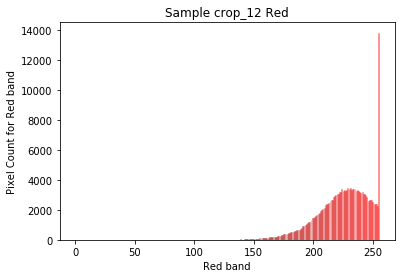

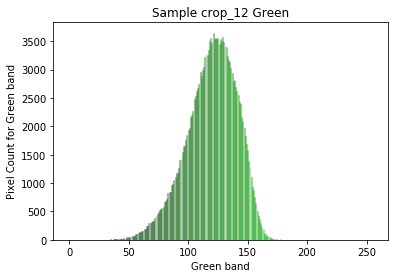

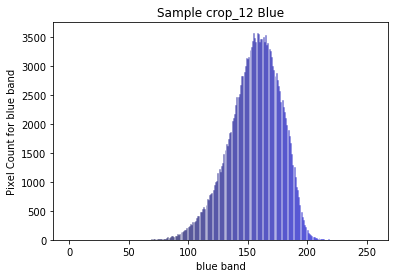

./SamplesPics_crop/crop_5.jpg


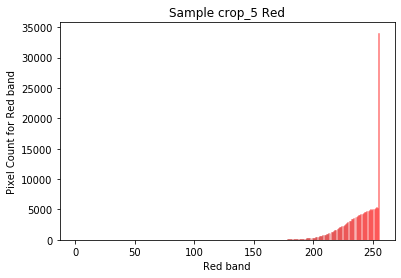

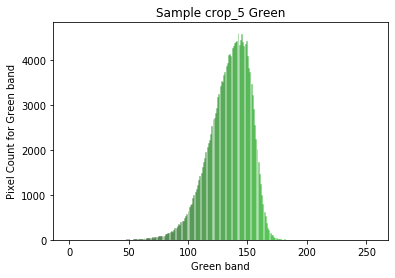

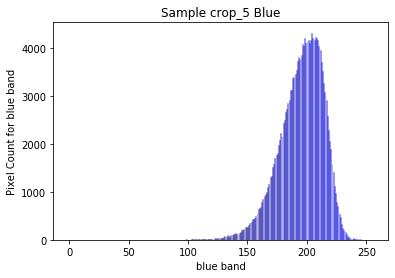

./SamplesPics_crop/crop_4.jpg


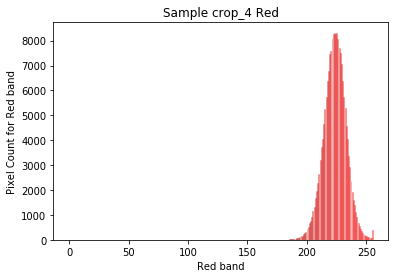

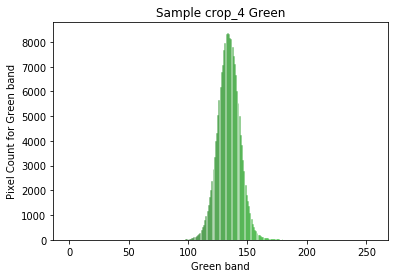

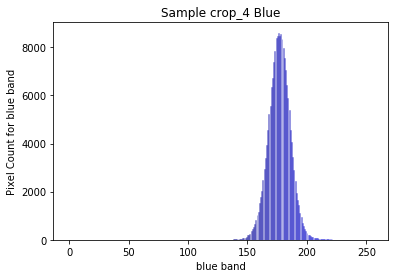

./SamplesPics_crop/crop_13.jpg


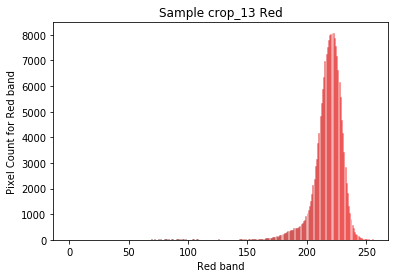

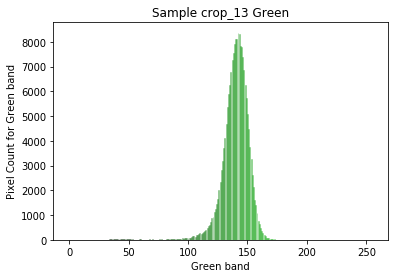

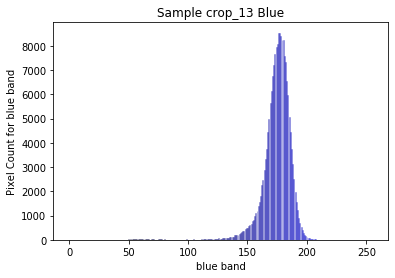

./SamplesPics_crop/crop_11.jpg


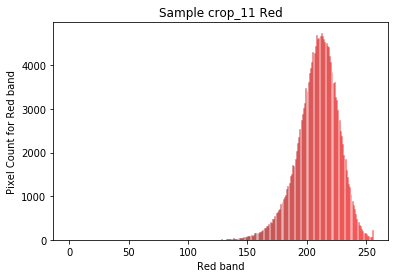

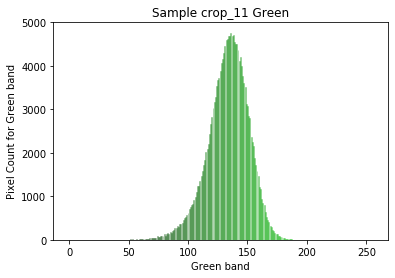

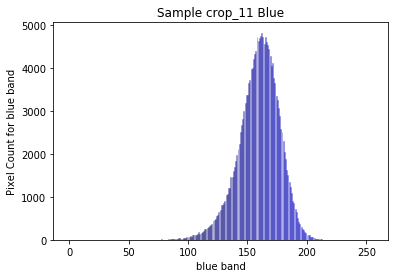

./SamplesPics_crop/crop_6.jpg


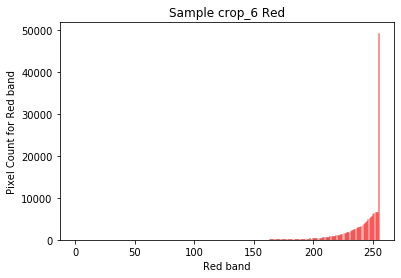

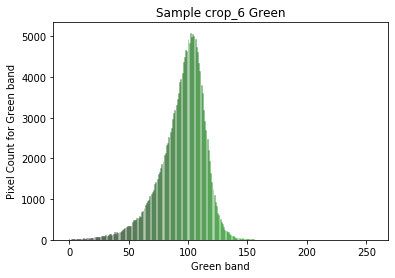

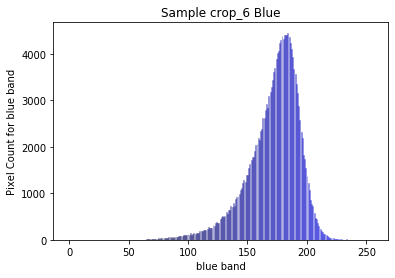

./SamplesPics_crop/crop_7.jpg


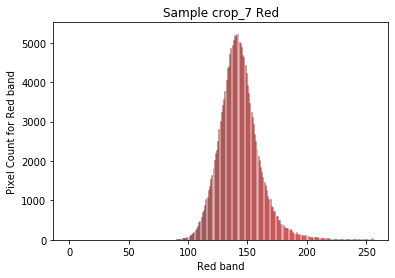

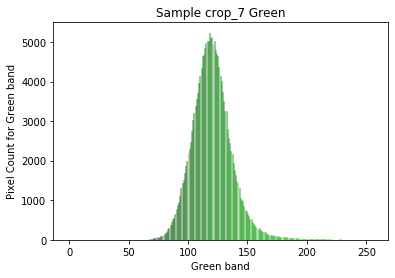

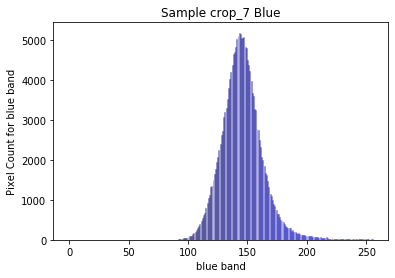

./SamplesPics_crop/crop_10.jpg


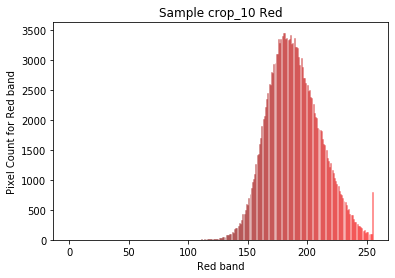

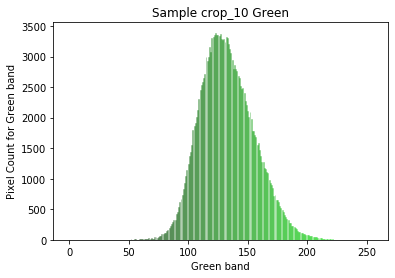

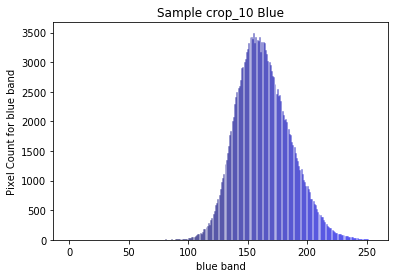

./SamplesPics_crop/crop_14.jpg


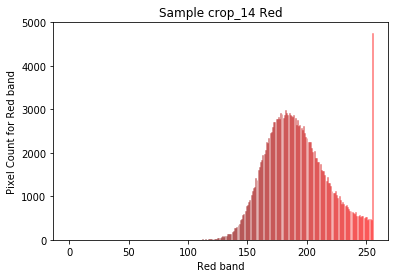

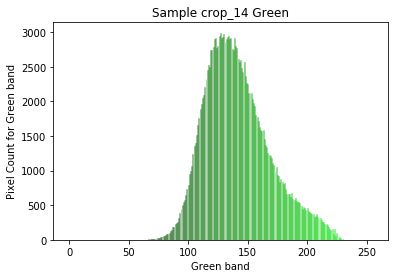

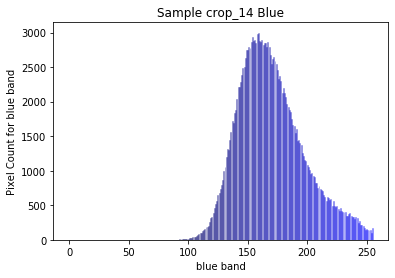

./SamplesPics_crop/crop_3.jpg


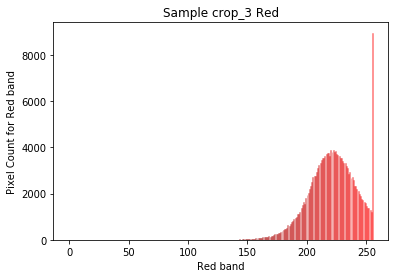

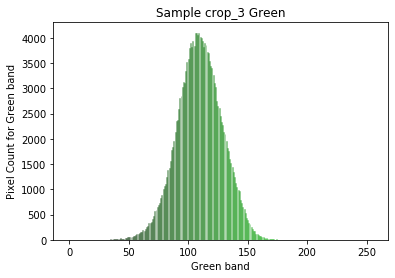

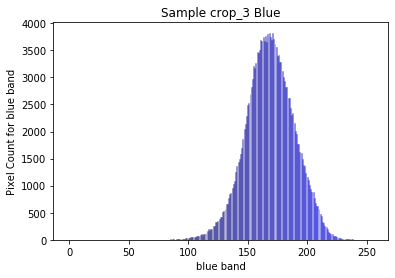

./SamplesPics_crop/crop_2.jpg


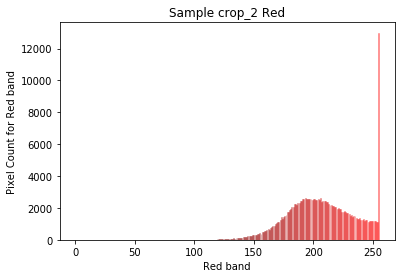

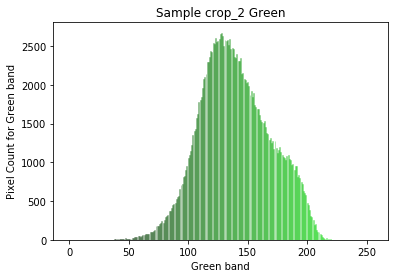

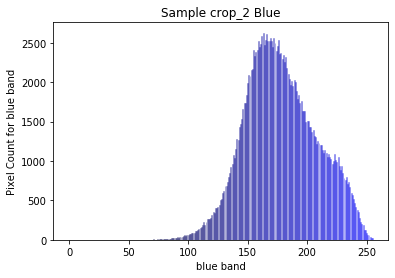

./SamplesPics_crop/crop_15.jpg


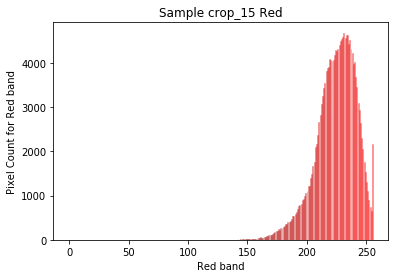

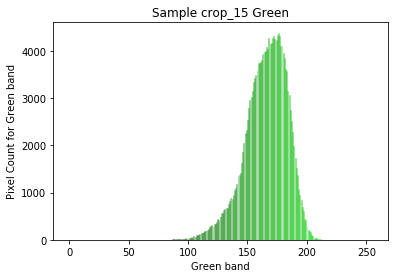

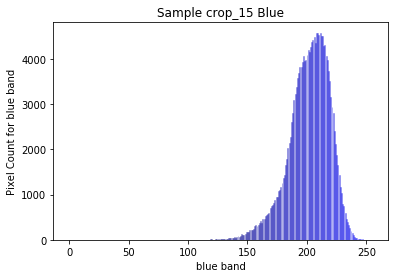

./SamplesPics_crop/crop_1.jpg


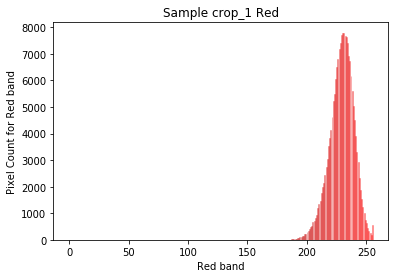

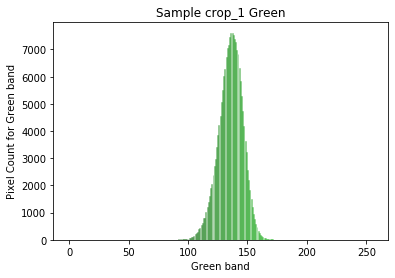

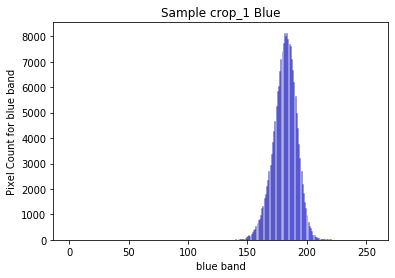

./SamplesPics_crop/crop_16.jpg


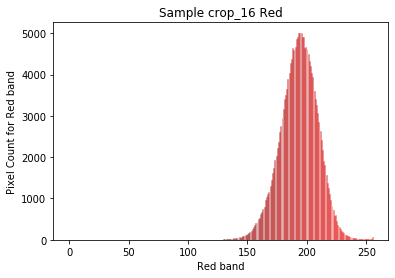

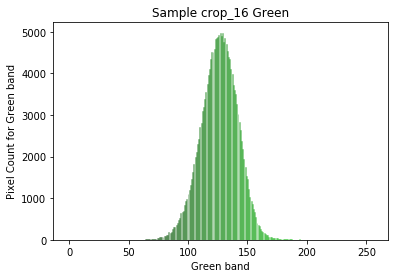

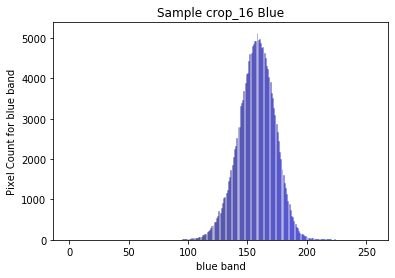

./SamplesPics_crop/crop_9.jpg


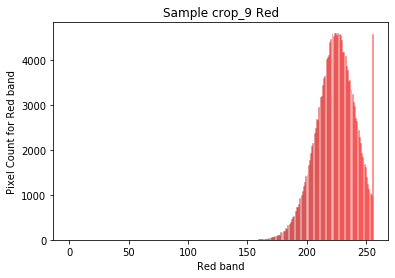

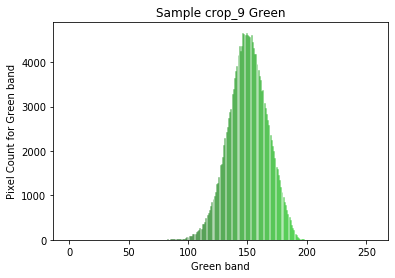

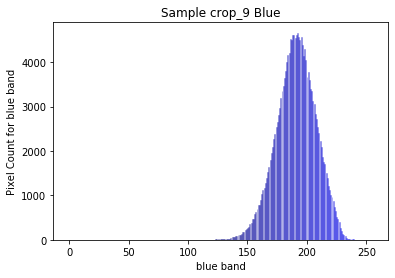

./SamplesPics_crop/crop_8.jpg


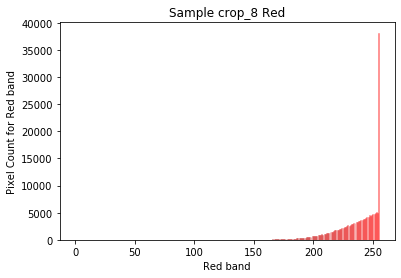

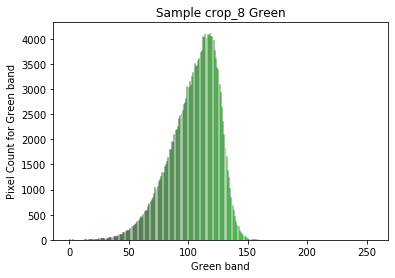

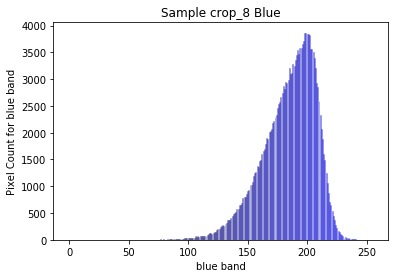

In [55]:
#load photo and make histogram
base = get_imlist('./SamplesPics_crop/')
x=0
for i in base:
    im=Image.open(i)
    im.show()
    get_histogram(im)

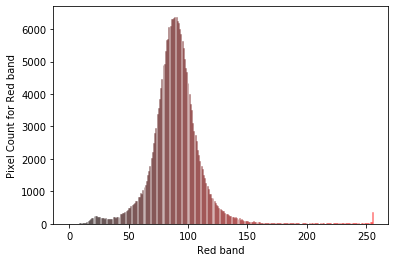

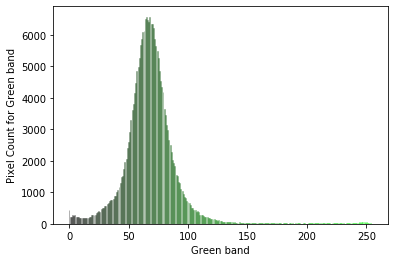

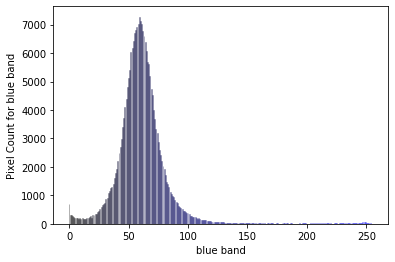

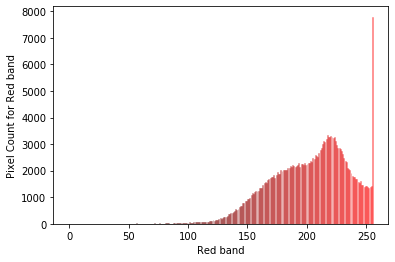

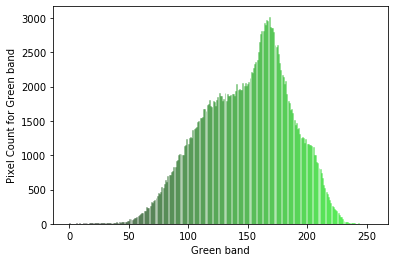

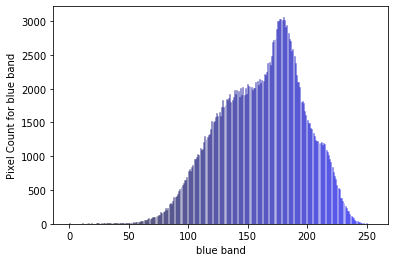

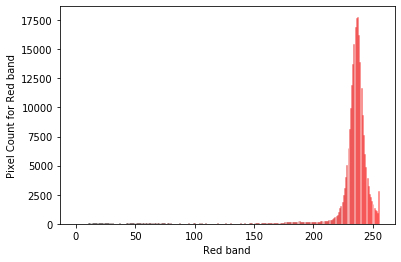

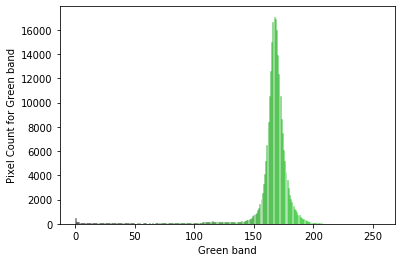

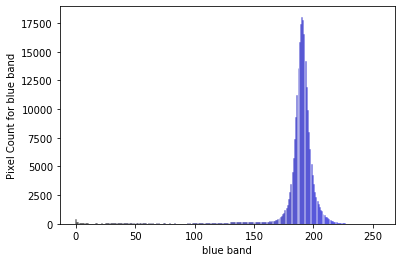

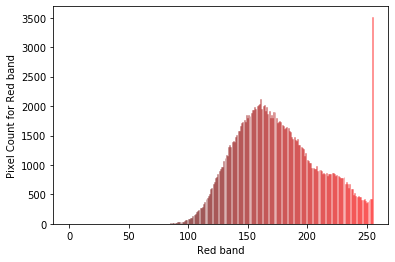

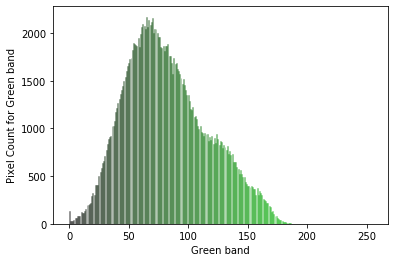

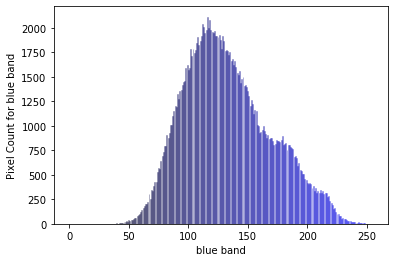

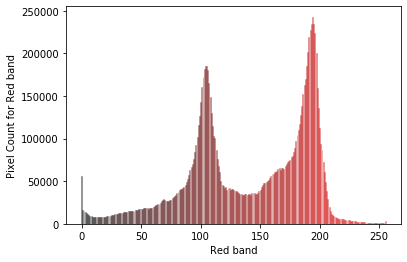

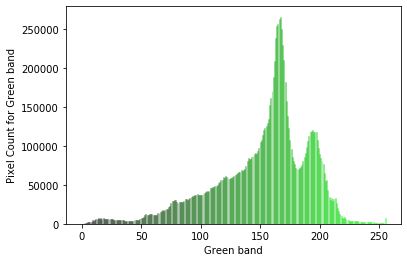

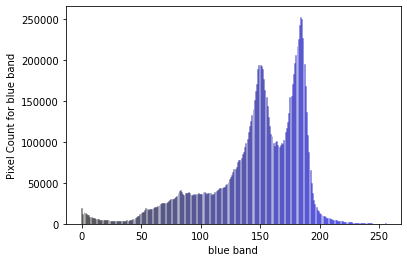

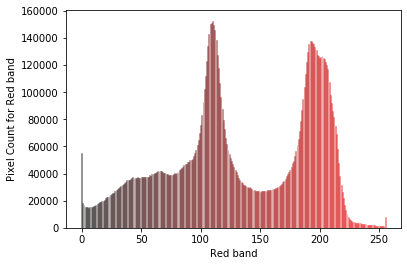

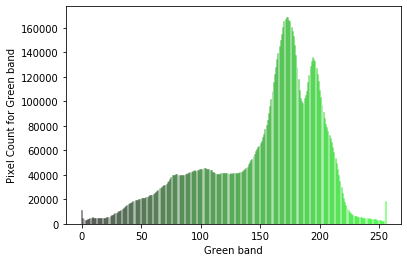

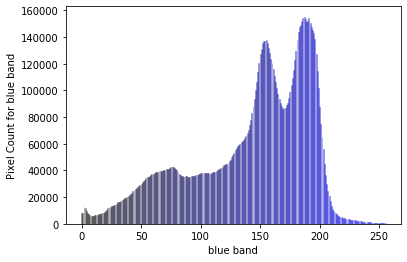

In [5]:
base = get_imlist('./dataset_base/')
x=0
for i in base:
    x+=1
    base_i=Image.open(i)
    pixel_num= 1000
    base_i_crop=crop_fix_image(pixel_num,base_i)
    base_i_crop.show()
    
    filename=str('crop_'+ str(x))
    fullpath = os.path.join('./dataset_crop/', filename + '.jpeg' )
   
    base_i_crop.save(fullpath)
    get_histogram(base_i)

imlist = get_imlist('./dataset_TEST/')

# print (imlist[1])
# im = Image.open(imlist[1]) 
# get_histogram(im)
# print ('done')
